In [41]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
%matplotlib inline

In [30]:
import pandas as pd
df=pd.read_csv('housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [31]:
cat_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
for col in cat_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})
df['furnishingstatus'] = df['furnishingstatus'].replace('nan', 'unfurnished')
df['furnishingstatus'] = df['furnishingstatus'].map({
    'furnished': 2,
    'semi-furnished': 1,
    'unfurnished': 0
})


In [32]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


In [75]:
from sklearn.model_selection import train_test_split

# X = all columns except the first (price)
X = df.iloc[:, 1:]

# y = first column (price)
y = df.iloc[:, 0]

X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.8,test_size=0.2, random_state=42)


In [27]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,2
1,8960,4,4,4,1,0,0,0,1,3,0,2
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,2
4,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,0
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,0
543,2910,3,1,1,0,0,0,0,0,0,0,2


In [34]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [28]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
183,7980,3,1,1,1,0,0,0,0,1,1,1
338,3780,2,1,2,1,1,1,0,0,0,0,1
50,7440,3,2,4,1,0,0,0,0,1,1,0
401,9500,3,1,2,1,0,0,0,0,3,1,0
131,5828,4,1,4,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
445,3450,1,1,1,1,0,0,0,0,0,0,2
535,3360,2,1,1,1,0,0,0,0,1,0,0
10,13200,3,1,2,1,0,1,0,1,2,1,2
283,4360,4,1,2,1,0,0,0,0,0,0,2


In [76]:
numerical_X_train=X_train.values
numerical_y_train=y_train.values
numerical_X_valid=X_test.values
numerical_y_valid=y_test.values

In [77]:
import numpy as np
area = df['area'].values
area_mean = np.mean(area)
area_min = np.min(area)
area_max = np.max(area)
area_normalized = (area - area_mean) / (area_max - area_min)
df['area'] = area_normalized

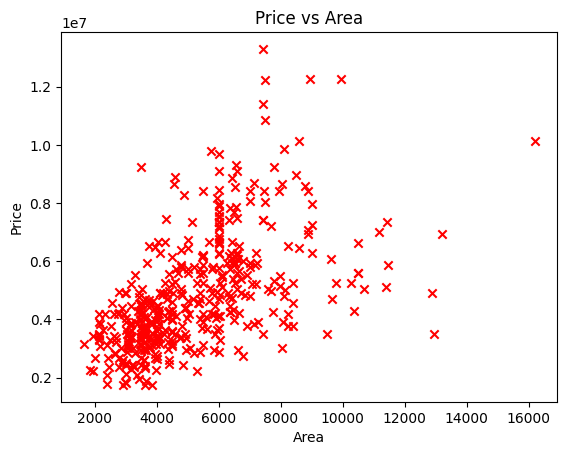

In [45]:
plt.scatter(X_train['area'], y_train, marker='x', c='r') 
plt.title("Price vs Area")
# Set the y-axis label
plt.ylabel('Price')
# Set the x-axis label
plt.xlabel('Area')
plt.show()

In [43]:
y_train

130    5866000
347    3836000
435    3290000
430    3290000
151    5565000
        ...   
466    3010000
328    3990000
201    4900000
30     8400000
411    3430000
Name: price, Length: 436, dtype: int64

In [52]:
def compute_cost(X,y,w,b):
    m=X.shape[0]
    cost=0.0
    for i in range(m):
        f_wb=np.dot(X[i],w)+b
        cost=cost+(f_wb-y[i])**2
    cost=cost/(2*m)
    return cost

In [48]:
def compute_gradient(X,y,w,b):
    m,n=X.shape
    dj_dw=np.zeros(n)
    dj_db=0.0
    cost=0.0
    for i in range(m):
        err=np.dot(X[i],w)+b-y[i]
        for j in range(n):
            dj_dw[j]+=(err*X[i,j])
        dj_db+=err
    dj_dw=dj_dw/m
    dj_db=dj_db/m
    
    return dj_dw,dj_db

In [78]:
def compute_gradient_descent(X,y,w,b,cost_function,gradient_function,iterations,alpha):
    
    J_hist=[]
    wlist=[]
    for i in range(iterations):
        dj_dw,dj_db=gradient_function(X,y,w,b)
        w=w-alpha*dj_dw
        b=b-alpha*dj_db   
        wlist.append(w.tolist())
        J_hist.append(cost_function(X, y, w, b).tolist())

        
        if i% math.ceil(iterations/ 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_hist[-1][0]}")
        
    return w, b, J_hist,wlist

In [79]:
initial_w= np.zeros(12)
initial_b = 0
iterations = 10000
alpha = 0.05

w_f, b_f, J_hist,wlist = compute_gradient_descent(numerical_X_train, numerical_y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    iterations,alpha)
print(f"b,w found by gradient descent: {b_f},{w_f} ")
m= numerical_X_train.shape[0]
for i in range(10):
    print(f"prediction: {(10000000*(np.dot(numerical_X_valid[i], w_f) + b_f))[0]:0.2f}, target value: {(10000000*numerical_y_valid[i])[0]:0.2f}")

KeyError: 0